In [18]:
import torch

In [19]:
from torch import nn

In [20]:
from d2l import torch as d2l

In [27]:
def vgg_block(num_convs,in_channels,out_channels):
    layers = []
    for _ in range(num_convs):
        layers.append(nn.Conv2d(
           in_channels,out_channels,kernel_size=3,padding=1
        ))
        layers.append(nn.ReLU())
        in_channels = out_channels
    layers.append(nn.MaxPool2d(kernel_size=2,stride=2))
    return nn.Sequential(*layers)

In [28]:
conv_arch = ((1,64),(1,128),(2,256),(2,512),(2,512))


def vgg(conv_arch):
    conv_blks = []
    in_channel = 1
    for (num_convs,out_channels) in conv_arch:
        conv_blks.append(vgg_block(
            num_convs,in_channel,out_channels
        ))
        in_channel = out_channels
    
    return nn.Sequential(
        *conv_blks,nn.Flatten(),
        nn.Linear(out_channels*7*7,4096),nn.ReLU(),
        nn.Dropout(0.5),nn.Linear(4096,4096),nn.ReLU(),
        nn.Dropout(0.5),nn.Linear(4096,10))


net = vgg(conv_arch)



In [29]:
X = torch.randn(size=(1,1,224,224))
for blk in net:
    X = blk(X)
    print(blk.__class__.__name__,'output shape:\t',X.shape)

Sequential output shape:	 torch.Size([1, 64, 112, 112])
Sequential output shape:	 torch.Size([1, 128, 56, 56])
Sequential output shape:	 torch.Size([1, 256, 28, 28])
Sequential output shape:	 torch.Size([1, 512, 14, 14])
Sequential output shape:	 torch.Size([1, 512, 7, 7])
Flatten output shape:	 torch.Size([1, 25088])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 4096])
ReLU output shape:	 torch.Size([1, 4096])
Dropout output shape:	 torch.Size([1, 4096])
Linear output shape:	 torch.Size([1, 10])


In [30]:
ratio = 4
small_conv_arch = [(pair[0],pair[1]//ratio) for pair in conv_arch]
net = vgg(small_conv_arch)

In [37]:
lr,num_epochs,batch_size = 0.05,10,128
train_iter,test_iter = d2l.load_data_fashion_mnist(batch_size,resize=224)

KeyboardInterrupt: 

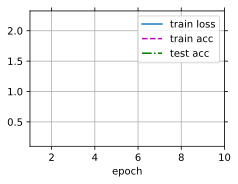

In [38]:
d2l.train_ch6(net,train_iter,test_iter,num_epochs,lr,'cpu')

In [21]:
net = nn.Sequential(
    nn.Conv2d(1,96,kernel_size=11,stride=4,padding=1),nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,stride=2),
    nn.Conv2d(96,256,kernel_size=5,padding=2),nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,stride=2),
    nn.Conv2d(256,384,kernel_size=3,padding=1),nn.ReLU(),
    nn.Conv2d(384,384,kernel_size=3,padding=1),nn.ReLU(),
    nn.Conv2d(384,384,kernel_size=3,padding=1),nn.ReLU(),
    nn.MaxPool2d(kernel_size=3,stride=2),nn.Flatten(),
    nn.Linear(6400,4096),nn.ReLU(),nn.Dropout(p=0.5),
    nn.Linear(4096,4096),nn.ReLU(),nn.Dropout(p=0.5),
    nn.Linear(4096,10)
)

In [22]:
X = torch.randn(1,1,224,224)

In [23]:
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__,'output shape:\t',X.shape)

Conv2d output shape:	 torch.Size([1, 96, 54, 54])
ReLU output shape:	 torch.Size([1, 96, 54, 54])
MaxPool2d output shape:	 torch.Size([1, 96, 26, 26])
Conv2d output shape:	 torch.Size([1, 256, 26, 26])
ReLU output shape:	 torch.Size([1, 256, 26, 26])
MaxPool2d output shape:	 torch.Size([1, 256, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
Conv2d output shape:	 torch.Size([1, 384, 12, 12])
ReLU output shape:	 torch.Size([1, 384, 12, 12])
MaxPool2d output shape:	 torch.Size([1, 384, 5, 5])
Flatten output shape:	 torch.Size([1, 9600])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x9600 and 6400x4096)

In [14]:
def pool2d(X,pool_size,mode='max'):
    p_h,p_w = pool_size
    Y = torch.zeros(X.shape[0]-p_h+1,X.shape[1]-p_w+1)
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            if mode == 'max':
                Y[i,j] = X[i:i+p_h,j:j+p_w].max()
            elif mode == 'avg':
                Y[i,j] = X[i:i+p_h,j:j+p_w].mean()
    return Y

In [7]:
from d2l import torch as d2l

In [8]:
class Reshape(torch.nn.Module):
    def forward(self,x):
        return x.view(-1,1,28,28)

In [9]:
net = torch.nn.Sequential(
   Reshape(),nn.Conv2d(1,6,kernel_size=5,padding=2),nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2,stride=2),
    nn.Conv2d(6,16,kernel_size=5),nn.Sigmoid(),
    nn.AvgPool2d(kernel_size=2,stride=2),nn.Flatten(),
    nn.Linear(16*5*5,120),nn.Sigmoid(),
    nn.Linear(120,84),nn.Sigmoid(),
    nn.Linear(84,10)
)

In [10]:
X = torch.rand(size=(1,1,28,28),dtype=torch.float32)
for layer in net:
    X = layer(X)
    print(layer.__class__.__name__,'output shape:\t',X.shape)

Reshape output shape:	 torch.Size([1, 1, 28, 28])
Conv2d output shape:	 torch.Size([1, 6, 28, 28])
Sigmoid output shape:	 torch.Size([1, 6, 28, 28])
AvgPool2d output shape:	 torch.Size([1, 6, 14, 14])
Conv2d output shape:	 torch.Size([1, 16, 10, 10])
Sigmoid output shape:	 torch.Size([1, 16, 10, 10])
AvgPool2d output shape:	 torch.Size([1, 16, 5, 5])
Flatten output shape:	 torch.Size([1, 400])
Linear output shape:	 torch.Size([1, 120])
Sigmoid output shape:	 torch.Size([1, 120])
Linear output shape:	 torch.Size([1, 84])
Sigmoid output shape:	 torch.Size([1, 84])
Linear output shape:	 torch.Size([1, 10])


     |████████████████████████████████| 83 kB 148 kB/s eta 0:00:01


In [11]:
def evaluate_accuracy_gpu(net,data_iter,device=None):
    if isinstance(net,torch.nn.Module):
        net.eval()
        if not device:
            device = next(iter(net.parameters())).device
    metric = d2l.Accumulator(2)
    for x,y in data_iter:
        if isinstance(X,list):
            X = [x.to(device) for x in X]
        else:
            X = X.to(device)
        y = t.to(device)
        metric.add(d2l.accuracy(net(X),y),y.numel())
    return metric[0] / metric[1]

In [16]:
def train_ch6(net,train_iter,test_iter,num_epochs,lr,device):
    def init_weight(m):
        if type(m) == nn.Linear or type(m) == nn.Conv2d:
            nn.init.xavier_uniform_(m.weight)
        net.apply(init_weight)
        print('training on',device)
        net.to(device)
        optimizer = torch.optim.SGD(net.parameters(),lr=lr)
        loss = nn.CrossEntropyLoss()
        animator = d2l.Animator(xlabel='epoch',xlim=[1,num_epochs],
                               lengend=['train loss','train acc','test'])
        timer,num_batches = d21.Timer(),len(train_iter)
        for epoch in range(num_epochs):
            metric = d2l.Accumulator(3)
            net.train()
            for i,(X,y) in enumerate(train_iter):
                timer.start()
                optimizer.zero_grad()
                X,y = X.to(device),y.to(device)
                y_hat = net(X)
                l = loss(y_hat,y)
                l.backward()
                optimizer.step()
                metric.add(1*X.shape[0],d2l.accuracy(y_hat,y,X.shape[0]))
                timer.stop()
                train_1 = metric[0] / metric[2]
                train_acc = metric[1] .metric[2]
                if (i+1) % (num_epochs//5) == 0 or i == num_batches:
                    animator.add(epoch+(i+1)/num_batches,(train_1,train_acc,None))
            test_acc = evaluate_accuracy_gpu(net,test_iter)
            animator.add(epoch+1,(None,None,test_acc))
        print(f'loss {train_1:.3f}, train acc {train_acc:.3f}',
             f'test acc {test_acc:.3f}')
        print(f'{metric[2] * num_epochs/timer.sum():.1f}')
                

In [17]:
lr,num_epochs = 0.9,10
train_ch6(net,train_iter,test_iter,num_epochs,lr,'cpu')

NameError: name 'train_iter' is not defined

In [17]:
X = torch.tensor([[0.0,1.0,2.0],[3.0,4.0,5.0],[6.0,7.0,8.0]])
pool2d(X,(2,2),'avg')

tensor([[2., 3.],
        [5., 6.]])

In [18]:
X = torch.arange(16,dtype=torch.float32).reshape((1,1,4,4))
X

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]]]])

In [21]:
pool2d = nn.MaxPool2d((2,3),padding=(1,1),stride=(2,3))
pool2d(X)

tensor([[[[ 1.,  3.],
          [ 9., 11.],
          [13., 15.]]]])

In [22]:
X = torch.cat((X,X+1),1)
X

tensor([[[[ 0.,  1.,  2.,  3.],
          [ 4.,  5.,  6.,  7.],
          [ 8.,  9., 10., 11.],
          [12., 13., 14., 15.]],

         [[ 1.,  2.,  3.,  4.],
          [ 5.,  6.,  7.,  8.],
          [ 9., 10., 11., 12.],
          [13., 14., 15., 16.]]]])

In [23]:
pool2d = nn.MaxPool2d(3,padding=1,stride=2)
pool2d(X)

tensor([[[[ 5.,  7.],
          [13., 15.]],

         [[ 6.,  8.],
          [14., 16.]]]])

In [3]:
def crr2d(X,K):
    h,w = K.shape
    Y = torch.zeros(X.shape[0]-h+1,X.shape[1]-w+1)
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            Y[i,j] = (X[i:i+h,j:j+w]*K).sum()
    return Y

In [4]:
X = torch.tensor([[0.0,1.0,2.0],[3.0,4.0,5.0],[6.0,7.0,8.0]])
K = torch.tensor([[0.0,1.0],[2.0,3.0]])
crr2d(X,K)

tensor([[19., 25.],
        [37., 43.]])

In [9]:
def corred_multi_in(X,K):
    return sum(crr2d(x,k) for x,k in zip(X,K))

In [10]:
X = torch.tensor([[[0.0,1.0,2.0]],[[1.0,2.0,3.0]]])
K = torch.tensor([[[0.0,1.0],[2.0,3.0]]])

In [11]:
corred_multi_in(X,K)

tensor([], size=(0, 2))

In [5]:
class Conv2D(nn.Module):
    def __init__(self,kernel_size):
        super().__init__()
        self.weight = nn.Parameter(torch.rand(kernel_size))
        self.bias = nn.Parameter(torch.zeros(1))
    
    def forward(self,x):
        return crr2d(x,self.weight) + self.bias

In [49]:
X = torch.ones((6,8)) 

In [50]:
X[:,2:6] = 0

In [48]:
X

tensor([[2., 2., 0., 0., 0., 0., 2., 2.],
        [2., 2., 0., 0., 0., 0., 2., 2.],
        [2., 2., 0., 0., 0., 0., 2., 2.],
        [2., 2., 0., 0., 0., 0., 2., 2.],
        [2., 2., 0., 0., 0., 0., 2., 2.],
        [2., 2., 0., 0., 0., 0., 2., 2.]])

In [23]:
K = torch.tensor([[1.0,-1.0]])

In [24]:
Y = crr2d(X,K)

In [25]:
Y

tensor([[ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.]])

In [27]:
conv2d = nn.Conv2d(1,1,kernel_size=(1,2),bias=False)

In [55]:
X = X.reshape((1,1,6,8))
Y = Y.reshape((1,1,6,7))

In [56]:
X

tensor([[[[1., 1., 0., 0., 0., 0., 1., 1.],
          [1., 1., 0., 0., 0., 0., 1., 1.],
          [1., 1., 0., 0., 0., 0., 1., 1.],
          [1., 1., 0., 0., 0., 0., 1., 1.],
          [1., 1., 0., 0., 0., 0., 1., 1.],
          [1., 1., 0., 0., 0., 0., 1., 1.]]]])

In [57]:
Y

tensor([[[[ 0.,  1.,  0.,  0.,  0., -1.,  0.],
          [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
          [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
          [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
          [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
          [ 0.,  1.,  0.,  0.,  0., -1.,  0.]]]])

In [58]:
for i in range(10):
    Y_hat = conv2d(X)
    l = (Y_hat-Y)**2
    conv2d.zero_grad()
    l.sum().backward()
    conv2d.weight.data[:] -= 3e-2 * conv2d.weight.grad
    if (i + 1) % 2 == 0:
        print(i,f'{l.sum():.3f}')

1 0.000
3 0.000
5 0.000
7 0.000
9 0.000


In [59]:
conv2d.weight.data.reshape((1,2))

tensor([[ 1.0000, -1.0000]])

In [2]:
import torch
from torch import nn
from torch.nn import functional as F

In [3]:
net = nn.Sequential(nn.Linear(20,256),nn.ReLU(),nn.Linear(256,10))

In [4]:
X = torch.rand(2,20)

In [5]:
net(X)

tensor([[ 0.0596, -0.1234,  0.3651,  0.1322, -0.1037,  0.0119, -0.2320,  0.1300,
          0.2925,  0.2008],
        [ 0.1067, -0.1219,  0.3519,  0.0927,  0.0498, -0.0938, -0.1782,  0.0705,
          0.1714,  0.0950]], grad_fn=<AddmmBackward>)

In [6]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(20,256)
        self.out = nn.Linear(256,10)
    
    def forward(self,X):
        return self.out(F.relu(self.hidden(X)))

In [7]:
net = MLP()

In [8]:
net(X)

tensor([[ 0.0759, -0.0972, -0.1065, -0.4298, -0.1268, -0.0379,  0.0512, -0.0049,
         -0.1302, -0.0135],
        [ 0.0683,  0.0028, -0.0496, -0.4596,  0.0519,  0.0552,  0.0325, -0.0766,
          0.0443, -0.0259]], grad_fn=<AddmmBackward>)

In [9]:
class MySequential(nn.Module):
    def __init__(self,*args):
        super().__init__()
        for block in args:
            self._modules[block] = block
    
    def forward(self,X):
        for block in self._modules:
            X = block(X)
        return X

In [10]:
net = MySequential(nn.Linear(20,256),nn.ReLU(),nn.Linear(256,10))

In [11]:
net(X)

tensor([[-0.1216,  0.1303, -0.1396, -0.3027, -0.0754,  0.1506,  0.1084,  0.2599,
         -0.1344, -0.0028],
        [ 0.0829,  0.1722, -0.1606, -0.2576, -0.0082,  0.1243, -0.0382,  0.1432,
         -0.0236, -0.0404]], grad_fn=<AddmmBackward>)

In [13]:
class FixedHiddenMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.rand_weight = torch.rand((20,20),requires_grad=False)
        self.linear = nn.Linear(20,20)
    
    def forward(self,X):
        X = self.linear(X)
        X = F.relu(torch.mm(X,self.rand_weight)+1)
        X = self.linear(X)
        while X.abs().sum() > 1:
            X /= 2
        return X.sum()

net = FixedHiddenMLP()
net(X)

tensor(-0.2347, grad_fn=<SumBackward0>)

In [14]:
class NestMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(nn.Linear(20,64),nn.ReLU(),
                                nn.Linear(64,32),nn.ReLU())
        self.linear = nn.Linear(32,16)
    
    def forward(self,X):
        return self.linear(self.net(X))

In [15]:
chimera = nn.Sequential(NestMLP(),nn.Linear(16,20),FixedHiddenMLP())

In [16]:
chimera(X)

tensor(-0.0253, grad_fn=<SumBackward0>)

In [23]:
import torch
from torch import nn

In [24]:
net = nn.Sequential(nn.Linear(4,8),nn.ReLU(),nn.Linear(8,1))
X = torch.rand(size=(2,4))

In [25]:
net(X)

tensor([[0.0441],
        [0.0064]], grad_fn=<AddmmBackward>)

In [26]:
print(net[2].state_dict())

OrderedDict([('weight', tensor([[ 0.0203,  0.0149,  0.1067,  0.2374,  0.1892,  0.2942,  0.0946, -0.0788]])), ('bias', tensor([-0.2793]))])


In [29]:
print(type(net[2].bias))
print(net[2].bias)
print(net[2].bias.data)

<class 'torch.nn.parameter.Parameter'>
Parameter containing:
tensor([-0.2793], requires_grad=True)
tensor([-0.2793])


In [31]:
net[2].weight.grad == None

True

In [33]:
for name,param in net.named_parameters():
    print(name,param.shape)

0.weight torch.Size([8, 4])
0.bias torch.Size([8])
2.weight torch.Size([1, 8])
2.bias torch.Size([1])


In [40]:
def block1():
    return nn.Sequential(nn.Linear(4,8),nn.ReLU(),nn.Linear(8,4),nn.ReLU())

In [41]:
def block2():
    net = nn.Sequential()
    for i in range(4):
        net.add_module(f'block {i}',block1())
    return net

In [42]:
rgnet = nn.Sequential(block2(),nn.Linear(4,1))
rgnet(X)

tensor([[0.0575],
        [0.0574]], grad_fn=<AddmmBackward>)

In [43]:
rgnet

Sequential(
  (0): Sequential(
    (block 0): Sequential(
      (0): Linear(in_features=4, out_features=8, bias=True)
      (1): ReLU()
      (2): Linear(in_features=8, out_features=4, bias=True)
      (3): ReLU()
    )
    (block 1): Sequential(
      (0): Linear(in_features=4, out_features=8, bias=True)
      (1): ReLU()
      (2): Linear(in_features=8, out_features=4, bias=True)
      (3): ReLU()
    )
    (block 2): Sequential(
      (0): Linear(in_features=4, out_features=8, bias=True)
      (1): ReLU()
      (2): Linear(in_features=8, out_features=4, bias=True)
      (3): ReLU()
    )
    (block 3): Sequential(
      (0): Linear(in_features=4, out_features=8, bias=True)
      (1): ReLU()
      (2): Linear(in_features=8, out_features=4, bias=True)
      (3): ReLU()
    )
  )
  (1): Linear(in_features=4, out_features=1, bias=True)
)

In [44]:
def init_normal(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight,mean=0,std=0.01)
        nn.init.zeros_(m.bias)

In [47]:
net.apply(init_normal)
net[0].weight.data,net[0].bias.data

(tensor([[-0.0012, -0.0039, -0.0002,  0.0060],
         [-0.0105,  0.0025,  0.0050,  0.0021],
         [ 0.0041,  0.0175, -0.0074,  0.0034],
         [-0.0029, -0.0281, -0.0011,  0.0088],
         [ 0.0128,  0.0108,  0.0161,  0.0084],
         [-0.0027, -0.0111,  0.0040, -0.0076],
         [-0.0091,  0.0084,  0.0075, -0.0060],
         [ 0.0033, -0.0020,  0.0015,  0.0076]]),
 tensor([0., 0., 0., 0., 0., 0., 0., 0.]))

In [48]:
def init_constant(m):
    if type(m) == nn.Linear:
        nn.init.constant_(m.weight,1)
        nn.init.zeros_(m.bias)

In [50]:
net.apply(init_constant)
net[0].weight.data,net[0].bias.data

(tensor([[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]),
 tensor([0., 0., 0., 0., 0., 0., 0., 0.]))

In [54]:
def xavier(m):
    if type(m) == nn.Linear:
        nn.init.xavier_uniform_(m.weight)

In [52]:
def init_42(m):
    if type(m) == nn.Linear:
        nn.init.constant_(m.weight,42)

In [55]:
net[0].apply(xavier)
net[2].apply(init_42)
print(net[0].weight.data[0])
print(net[2].weight.data)

tensor([ 0.0151, -0.2463,  0.0314,  0.3182])
tensor([[42., 42., 42., 42., 42., 42., 42., 42.]])


In [56]:
shared = nn.Linear(8,8)
net = nn.Sequential(nn.Linear(4,8),nn.ReLU(),shared,nn.ReLU(),shared,nn.ReLU(),
                    nn.Linear(8,1))
net(X)

tensor([[0.0177],
        [0.0367]], grad_fn=<AddmmBackward>)

In [57]:
print(net[2].weight.data[0] == net[4].weight.data[0])

tensor([True, True, True, True, True, True, True, True])


In [58]:
net[2].weight.data[0,0] = 100

In [59]:
print(net[2].weight.data[0] == net[4].weight.data[0])

tensor([True, True, True, True, True, True, True, True])


In [60]:
import torch
import torch.nn.functional as F
from torch import nn

In [61]:
class CenteredLayer(nn.Module):
    def __init__(self):
        super().__init__()
    
    def forward(self,X):
        return X - X.mean()

In [62]:
layer = CenteredLayer()
layer(torch.FloatTensor([1,2,3,4,5]))

tensor([-2., -1.,  0.,  1.,  2.])

In [63]:
class MyLinear(nn.Module):
    def __init__(self,in_units,units):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(in_units,units))
        self.bias = nn.Parameter(torch.randn(units,))
    
    def forward(self,X):
        linear = torch.matmul(X,self.weight.data) + self.bias
        return F.relu(linear)

In [64]:
dense = MyLinear(5,3)
dense.weight

Parameter containing:
tensor([[-1.3090, -0.9056,  0.9423],
        [ 1.0897, -1.0575,  0.4655],
        [ 1.6191,  0.7462,  1.1029],
        [ 0.0347,  1.3720,  0.5804],
        [ 1.8147,  1.2612, -1.7130]], requires_grad=True)

In [65]:
import torch
from torch import nn
from torch.nn import functional as F

In [66]:
x = torch.arange(4)
torch.save(x,'s-file')

In [67]:
x2 = torch.load('s-file')

In [68]:
x2

tensor([0, 1, 2, 3])

In [69]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(20,256)
        self.output = nn.Linear(256,10)
    
    def forward(self,x):
        return self.output(F.relu(self.hidden(x)))

In [70]:
net = MLP()
X = torch.randn(size=(2,20))
Y = net(X)

In [71]:
Y

tensor([[ 0.4922,  0.4622, -0.1323,  0.0264,  0.3755,  0.0107,  0.3469, -0.0452,
          0.0592, -0.2001],
        [ 0.1324,  0.1962, -0.1780,  0.1096,  0.0648, -0.2965,  0.0317, -0.3953,
         -0.1979,  0.0248]], grad_fn=<AddmmBackward>)

In [72]:
torch.save(net.state_dict(),'mlp.params')

In [73]:
clone = MLP()
clone.load_state_dict(torch.load('mlp.params'))
clone.eval()

MLP(
  (hidden): Linear(in_features=20, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)

In [74]:
Y_clone = clone(X)
Y_clone == Y

tensor([[True, True, True, True, True, True, True, True, True, True],
        [True, True, True, True, True, True, True, True, True, True]])